In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
display (os.getcwd())

'C:\\Users\\DELL\\ACCMEGRADE\\sales forcasting'

In [4]:
dt = pd.read_csv('Train.csv')
display (dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
print (dt.shape)

(8523, 12)


In [6]:
display (dt.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
display (dt.describe())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
display (dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

In [9]:
display (dt.apply(lambda x: len(x.unique())))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
display (dt.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
cat_col = []
for x in dt.dtypes.index:
    if dt.dtypes[x] == 'object':
        cat_col.append(x)
display (cat_col)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
display (cat_col)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [13]:
for col in cat_col:
    print(col , len(dt[col].unique()))

Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


In [14]:
for col in cat_col:
    print(col)
    print(dt[col].value_counts())
    print()
    print ('*' *50)

Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

**************************************************
Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

**************************************************
Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

**************************************************
Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2

In [15]:
miss_bool = dt['Item_Weight'].isnull()
display (miss_bool)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [16]:
display (dt['Item_Weight'].isnull().sum())

1463

In [17]:
Item_Weight_null = dt[dt['Item_Weight'].isna()]
display (Item_Weight_null)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [18]:
Item_Weight_null['Item_Identifier'].value_counts()

Item_Identifier
FDK08    2
FDA08    2
FDV23    2
FDY56    2
FDI04    2
        ..
FDM44    1
FDZ48    1
FDK41    1
FDD57    1
NCN18    1
Name: count, Length: 1142, dtype: int64

In [19]:
item_weight_mean = dt.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
display (item_weight_mean)

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [20]:
display (dt['Item_Identifier'])

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [21]:
for i, item in enumerate(dt['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean.index:
            dt['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            dt['Item_Weight'][i] = np.mean(dt['Item_Weight'])

In [22]:
result = dt['Item_Weight'].isnull().sum()
display (result)

0

In [23]:
result = dt.groupby('Outlet_Size').agg({'Outlet_Size': np.size})
display (result)

,Outlet_Size
Outlet_Size,
High,932
Medium,2793
Small,2388


In [24]:
result= dt['Outlet_Size'].isnull().sum()
display (result)

2410

In [25]:
Outlet_Size_null= dt[dt['Outlet_Size'].isna()]
display (Outlet_Size_null)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [26]:
result = Outlet_Size_null['Outlet_Type'].value_counts()
display (result)

Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

In [27]:
result= dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)

Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [28]:
outlet_size_mode = dt.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
display (outlet_size_mode)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [29]:
miss_bool = dt['Outlet_Size'].isnull()
dt.loc[miss_bool, 'Outlet_Size'] = dt.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [30]:
miss_bool = dt['Outlet_Size'].isnull()
for i, item in enumerate (dt['Outlet_Size']):
    if miss_bool[i]:
        dt['Outlet_Size'][i] = outlet_size_mode.loc['Outlet_Size',dt['Outlet_Type'][i] ]

In [31]:
display (dt['Outlet_Size'].isnull().sum())

0

In [32]:
result = dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':["size"]})
display (result)

Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small              1083
Supermarket Type1 High                932
                  Medium              930
                  Small              3715
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [33]:
display (sum(dt['Item_Visibility']==0))

526

In [34]:
dt.loc[:, 'Item_Visibility'].replace([0], [dt['Item_Visibility'].mean()], inplace=True)

In [35]:
display(sum(dt['Item_Visibility']==0))

0

In [36]:
result = dt['Item_Fat_Content'].value_counts()
display (result)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [37]:
dt['Item_Fat_Content'] = dt['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
result = dt['Item_Fat_Content'].value_counts()
display (result)

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

# Feature Engineering

In [38]:
dt['New_Item_Type'] = dt['Item_Identifier'].apply(lambda x: x[:2])
display (dt['New_Item_Type'])

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [39]:
display (dt['New_Item_Type'].value_counts())

New_Item_Type
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [40]:
dt['New_Item_Type'] = dt['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
display (dt['New_Item_Type'].value_counts())

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [41]:
display (dt['Item_Fat_Content'].value_counts())

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [42]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)

Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

In [43]:
dt.loc[dt['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
result =  (dt['Item_Fat_Content'].value_counts())
display (result)

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [44]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)

Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Non-Edible              1599

In [45]:
dt['Outlet_Years'] = 2024 - dt['Outlet_Establishment_Year']
print (dt['Outlet_Years'])

0       25
1       15
2       25
3       26
4       37
        ..
8518    37
8519    22
8520    20
8521    15
8522    27
Name: Outlet_Years, Length: 8523, dtype: int64


In [46]:
display (dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,25
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,26
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,37


# EDA

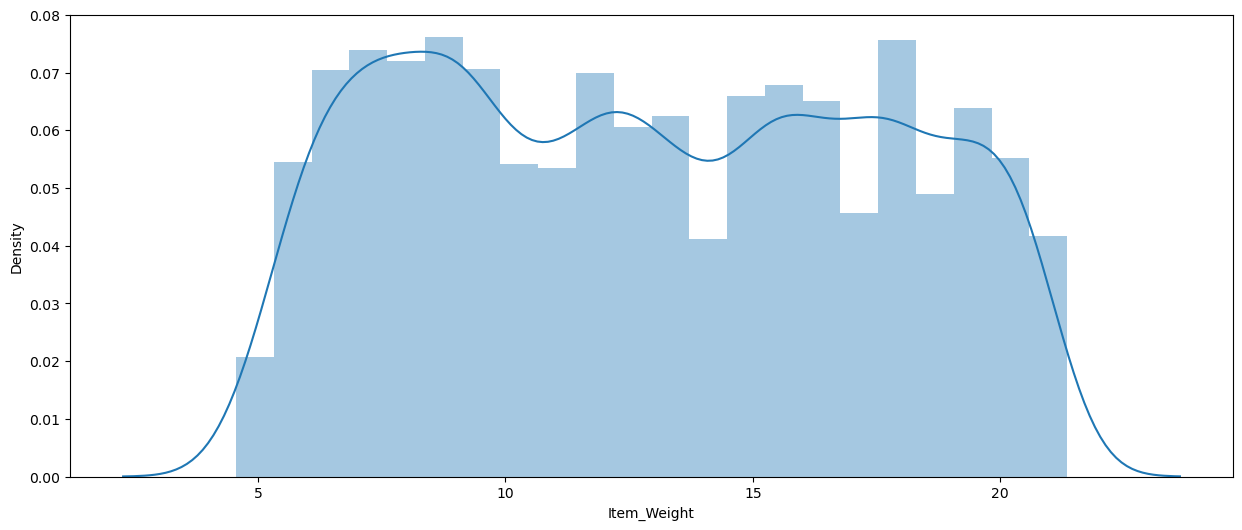

In [47]:
sns.distplot(dt['Item_Weight'])
plt.show()

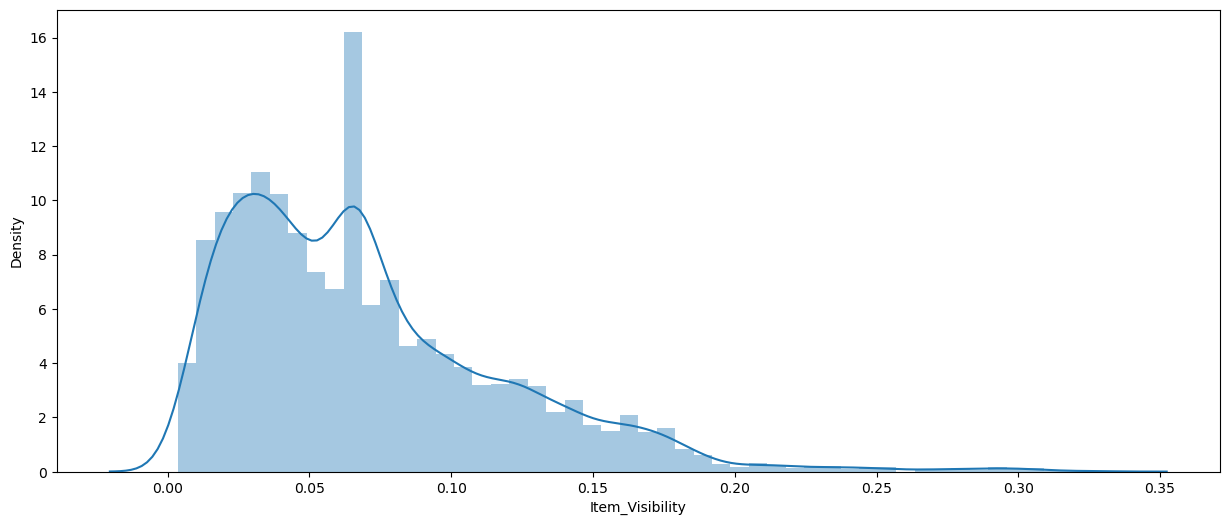

In [48]:
sns.distplot(dt['Item_Visibility'])
plt.show()

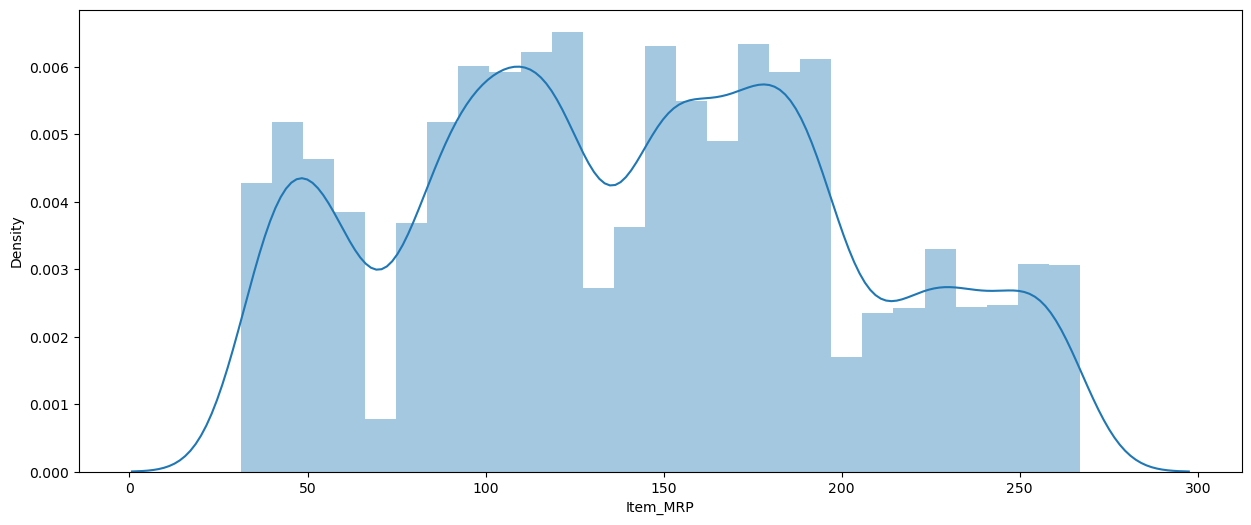

In [49]:
sns.distplot(dt['Item_MRP'])
plt.show()

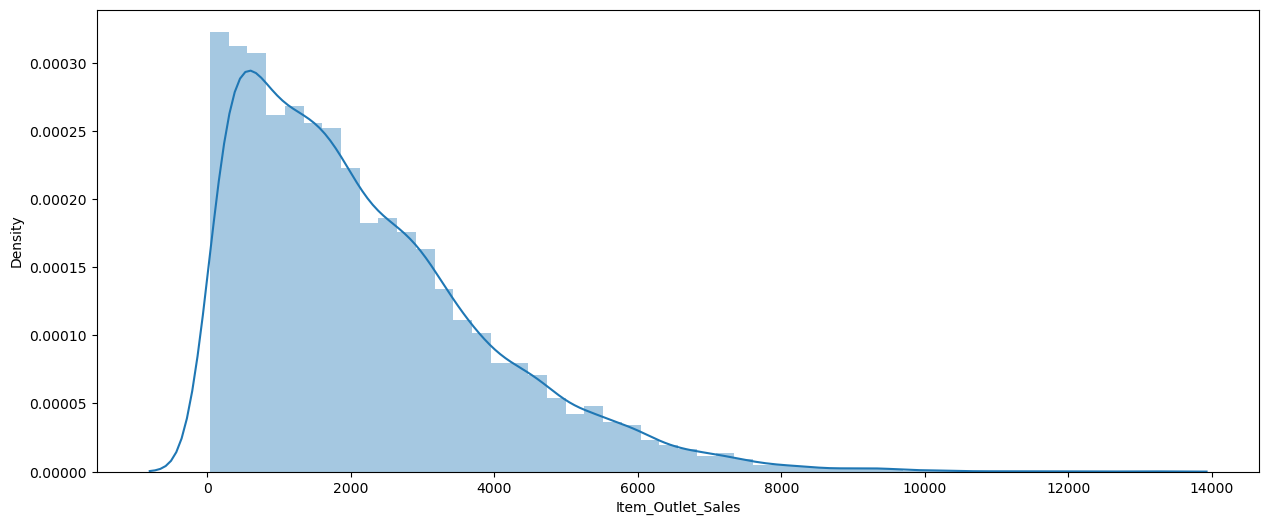

In [50]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()

In [51]:
dt['Item_Outlet_Sales'] = np.log(1+dt['Item_Outlet_Sales'])
display (dt['Item_Outlet_Sales'])

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

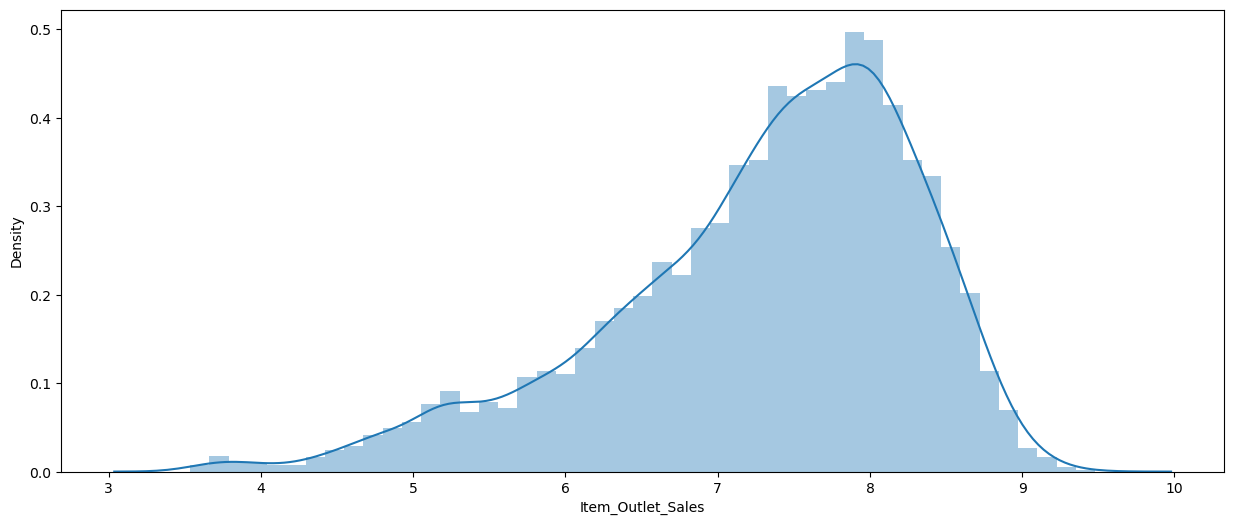

In [52]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()

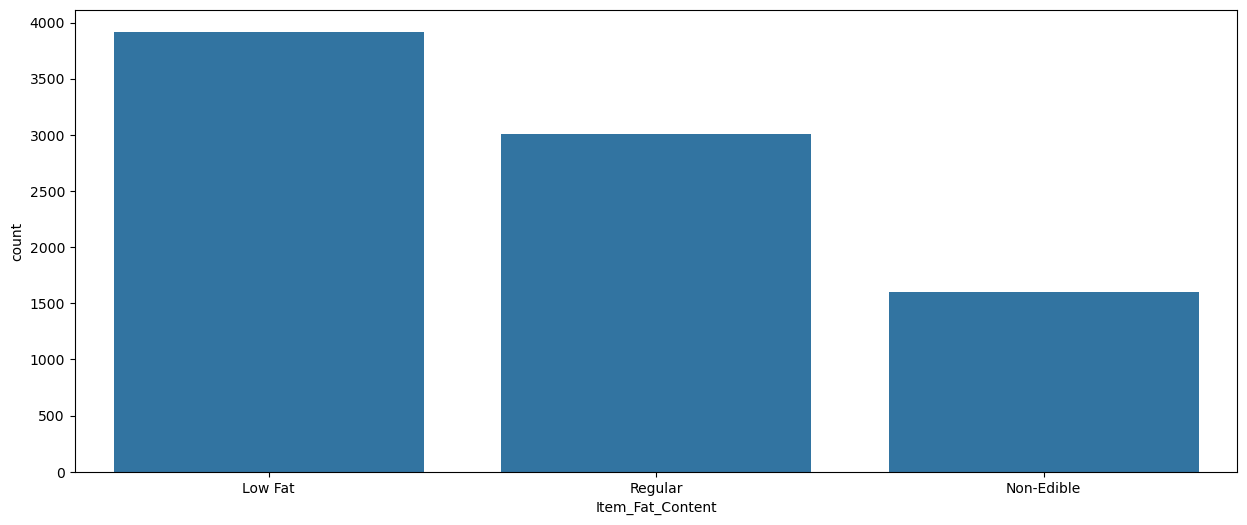

In [53]:
sns.countplot(x = dt["Item_Fat_Content"])
plt.show()

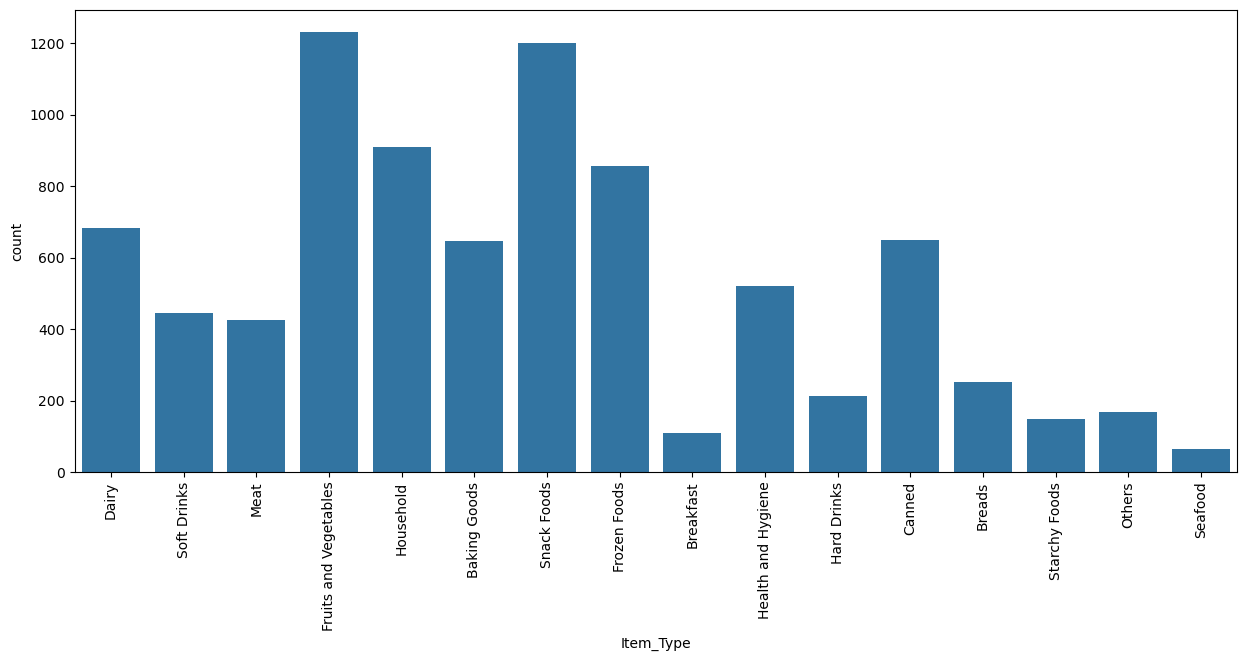

In [54]:
l = list(dt['Item_Type'].unique()) 
chart = sns.countplot(x =dt["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)
plt.show()

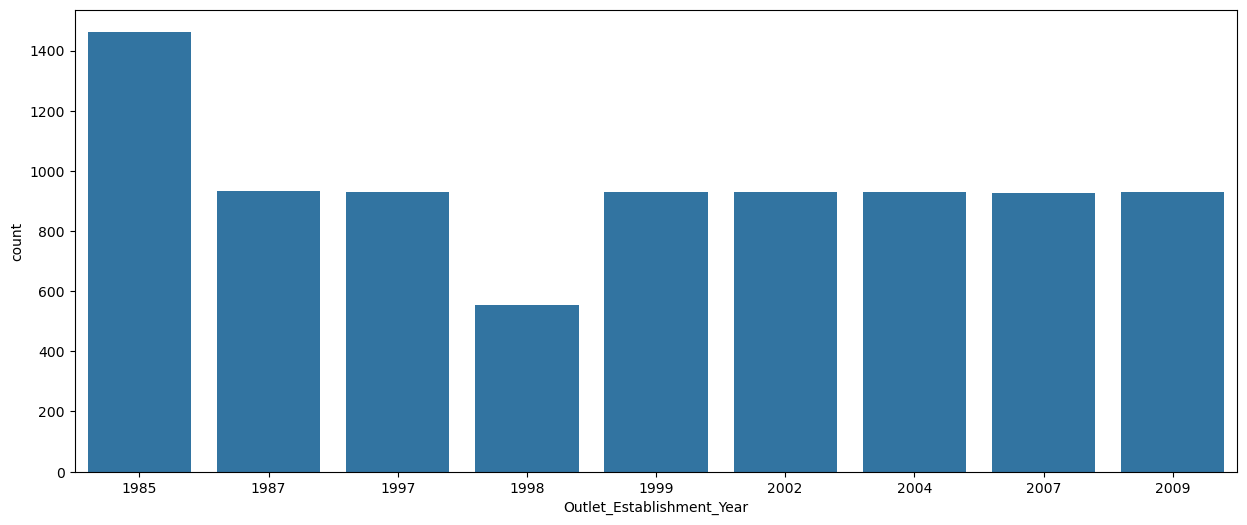

In [55]:
sns.countplot(x= dt['Outlet_Establishment_Year'])
plt.show()

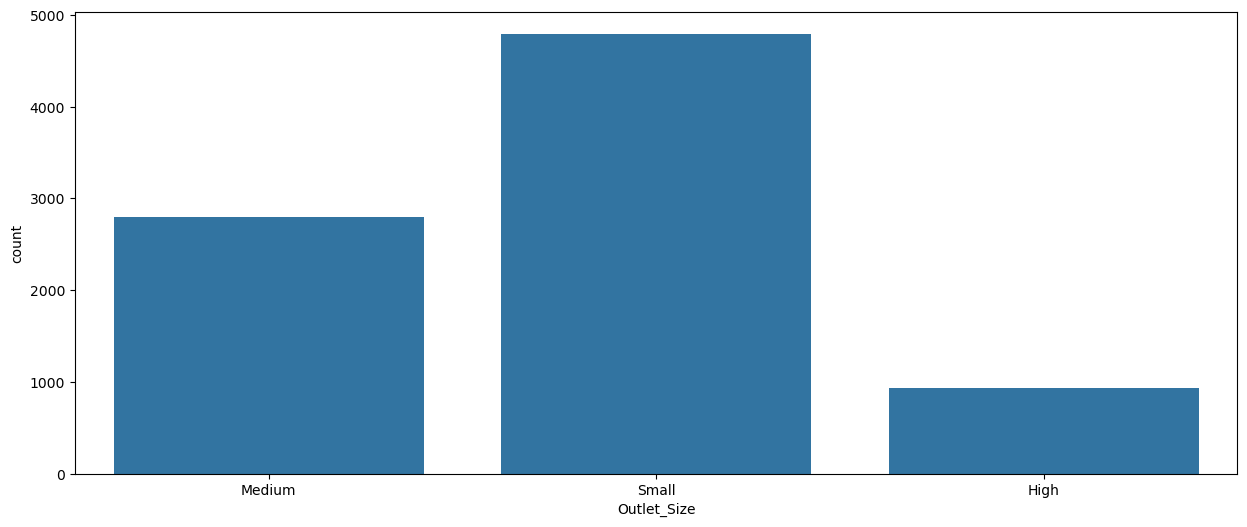

In [56]:
sns.countplot(x=dt['Outlet_Size'])
plt.show()

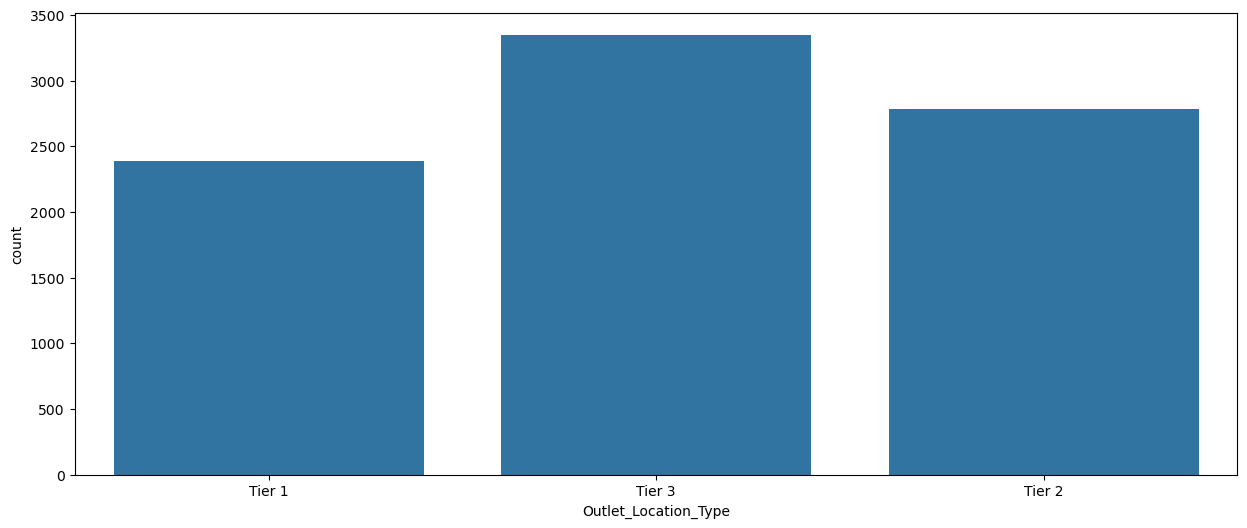

In [57]:
sns.countplot(x=dt['Outlet_Location_Type'])
plt.show()

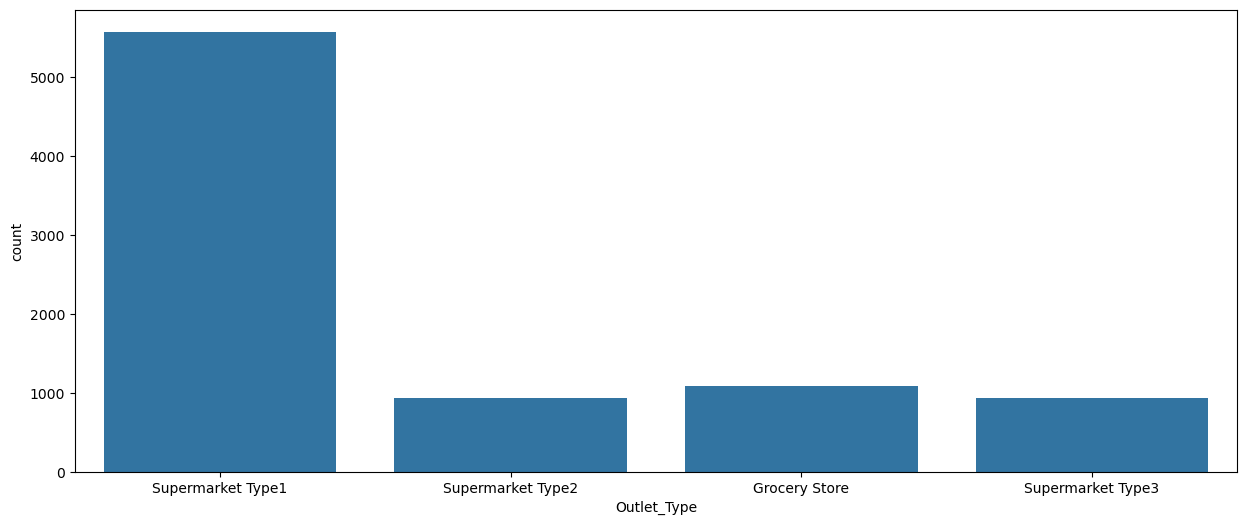

In [58]:
sns.countplot(x= dt['Outlet_Type'])
plt.show()

###### Co-relation matrix

In [59]:
#Display top 3 records to check columns with numeric values 
display(dt.head(3))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,25


In [60]:
#Create Data Frame with numeric columns 
dtc= dt.iloc[:,[1,3,5,7,11,13]]
display (dtc)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
0,9.300,0.016047,249.8092,1999,8.225808,25
1,5.920,0.019278,48.2692,2009,6.096776,15
2,17.500,0.016760,141.6180,1999,7.648868,25
3,19.200,0.066132,182.0950,1998,6.597664,26
4,8.930,0.066132,53.8614,1987,6.903451,37
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,7.929984,37
8519,8.380,0.046982,108.1570,2002,6.310436,22
8520,10.600,0.035186,85.1224,2004,7.085159,20
8521,7.210,0.145221,103.1332,2009,7.521100,15


In [61]:
#Print Co relation 
corr = dtc.corr()
display (corr)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017477,0.025972,-0.013418,0.007675,0.013418
Item_Visibility,-0.017477,1.000000,-0.005259,-0.078355,-0.202466,0.078355
Item_MRP,0.025972,-0.005259,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.013418,-0.078355,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.007675,-0.202466,0.509886,0.077032,1.000000,-0.077032
Outlet_Years,0.013418,0.078355,-0.005020,-1.000000,-0.077032,1.000000


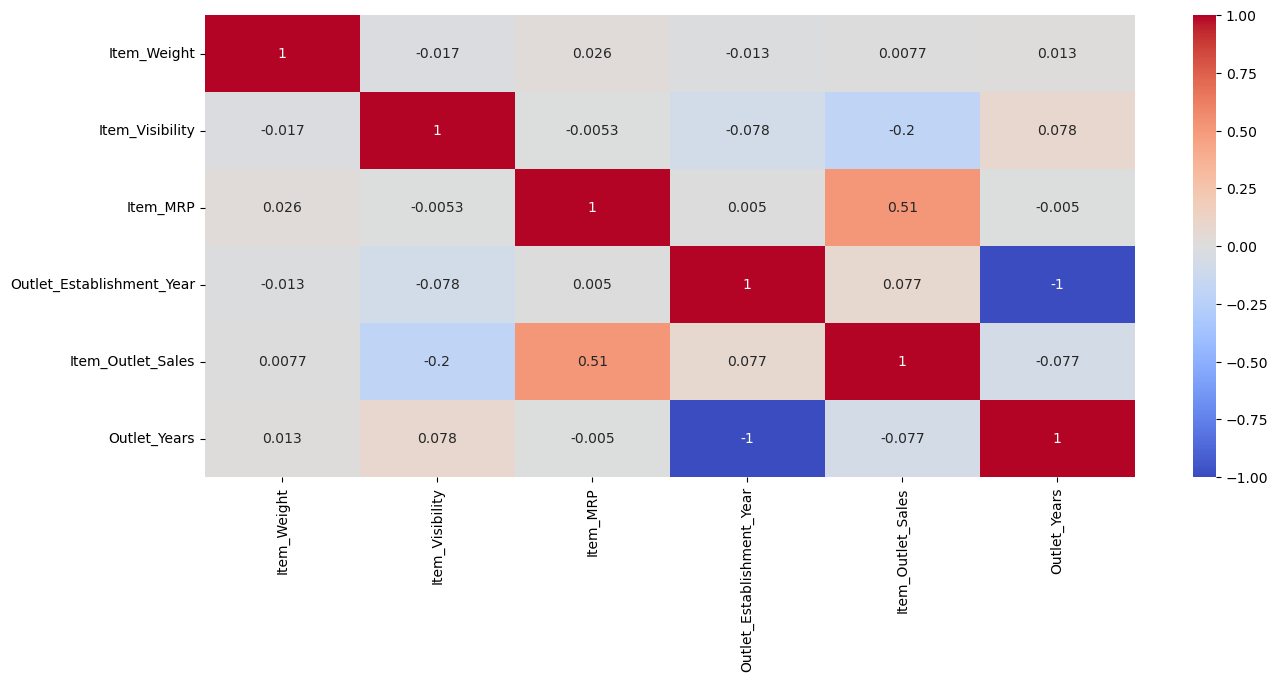

In [62]:
#Print Co Relation Matrix 
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [63]:
#Display Top 5 Records  
display (dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,25
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,26
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,37


###### Label Encoding

In [64]:
#Label Encoding – Column Outlet Identifier 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt['Outlet'] = le.fit_transform(dt['Outlet_Identifier'])
display (dt['Outlet'])

0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet, Length: 8523, dtype: int32

In [65]:
#Label Encoding – Remaining columns with For loop  
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    dt[col] = le.fit_transform(dt[col])
display (dt.head())  

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,25,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,15,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,25,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,26,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,37,1


###### One hot encoding

In [66]:
dt = pd.get_dummies(dt, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'],dtype = int )
display (dt.head())

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,25,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,15,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,25,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,26,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,37,1,...,0,0,1,0,1,0,0,0,0,1


In [67]:
#Create X – Remove un used columns 
X = dt.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
display (X.head())

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.30,0.016047,4,249.8092,25,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,14,48.2692,15,3,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,10,141.6180,25,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.066132,6,182.0950,26,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.066132,9,53.8614,37,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [68]:
#Create y 
y = dt['Item_Outlet_Sales']
display (y.head())

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [78]:
#Function to create Model 
#Display all Scoring options 
from sklearn import metrics 
display (",   ".join(metrics.get_scorer_names()))

'accuracy,   adjusted_mutual_info_score,   adjusted_rand_score,   average_precision,   balanced_accuracy,   completeness_score,   explained_variance,   f1,   f1_macro,   f1_micro,   f1_samples,   f1_weighted,   fowlkes_mallows_score,   homogeneity_score,   jaccard,   jaccard_macro,   jaccard_micro,   jaccard_samples,   jaccard_weighted,   matthews_corrcoef,   max_error,   mutual_info_score,   neg_brier_score,   neg_log_loss,   neg_mean_absolute_error,   neg_mean_absolute_percentage_error,   neg_mean_gamma_deviance,   neg_mean_poisson_deviance,   neg_mean_squared_error,   neg_mean_squared_log_error,   neg_median_absolute_error,   neg_negative_likelihood_ratio,   neg_root_mean_squared_error,   neg_root_mean_squared_log_error,   normalized_mutual_info_score,   positive_likelihood_ratio,   precision,   precision_macro,   precision_micro,   precision_samples,   precision_weighted,   r2,   rand_score,   recall,   recall_macro,   recall_micro,   recall_samples,   recall_weighted,   roc_auc,  

# Model Training and Evaluation

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train(model, X, y):
    model.fit(X,y)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    print (X.shape, y.shape)
    print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)

In [141]:
from sklearn.model_selection import train_test_split
X = np.random.rand(8523, 12)  # 100 samples, 5 features
y = np.random.rand(8523)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (X.shape, y.shape)
print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)

(8523, 12) (8523,)
(5966, 12) (2557, 12) (5966,) (2557,)


In [142]:
# training the model
model.fit(X_train, y_train)  

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 5966, number of used features: 12
[LightGBM] [Info] Start training from score 0.501453


LGBMRegressor()

In [143]:
# perform cross-validation
cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
print("Model Report")
print ('Scoring - neg_mean_squared_error')
print ( cv_score )    
cv_score = np.abs(np.mean(cv_score))    
print ('ABS Average of - neg_mean_squared_error',cv_score )       
cv_score = cross_val_score(model, X, y,  cv=5)
print ()
print ('R2 Score ')
print ( cv_score )    
cv_score = np.mean(cv_score)     
print ('Average R2 Score ',cv_score)    
print ()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 12
[LightGBM] [Info] Start training from score 0.503299
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 12
[LightGBM] [Info] Start training from score 0.502357
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 12
[LightGBM] [Info] Start traini

In [144]:
   # Display Accuracy
print ('Accuracy')
print ('Accuracy of Test data')
y_test_pred = model.predict(X_test)
print('R2_Score:', r2_score(y_test,y_test_pred))
print ('Accuracy of Training data')
y_train_pred = model.predict(X_train)
print('R2_Score:', r2_score(y_train,y_train_pred))
print ('Accuracy of Complete data')
y_pred = model.predict(X)
print('R2_Score:', r2_score(y,y_pred))
print ()

Accuracy
Accuracy of Test data
R2_Score: -0.05040177940572654
Accuracy of Training data
R2_Score: 0.4351774516003396
Accuracy of Complete data
R2_Score: 0.29132075549120995



Display actual and predicted values


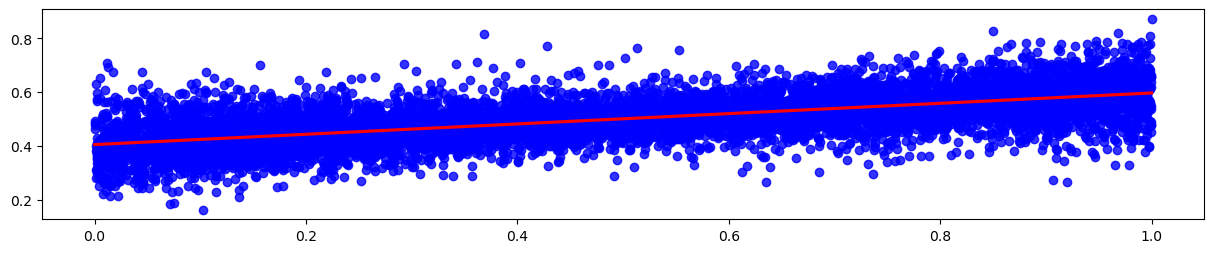

In [145]:
 # Display graph with actual and predicted values 
    
plt.subplot (212)    
print ('Display actual and predicted values')
sns.regplot( x =y, y= y_pred, scatter_kws={"color": "b"}, 
        line_kws={"color": "r"},ci = None)
plt.show()

###### Create Linear Regression Model  


(8523, 12) (8523,)
(5966, 12) (2557, 12) (5966,) (2557,)
Item_Type                   -0.016603
Outlet_Size                 -0.008710
Item_Outlet_Sales           -0.001416
Item_Fat_Content            -0.000184
Item_MRP                     0.002316
Outlet_Type                  0.007400
Item_Visibility              0.007716
Item_Weight                  0.008596
Item_Identifier              0.009915
Outlet_Location_Type         0.012115
Outlet_Identifier            0.015326
Outlet_Establishment_Year    0.017310
dtype: float64


<Axes: title={'center': 'Model Coefficients'}>

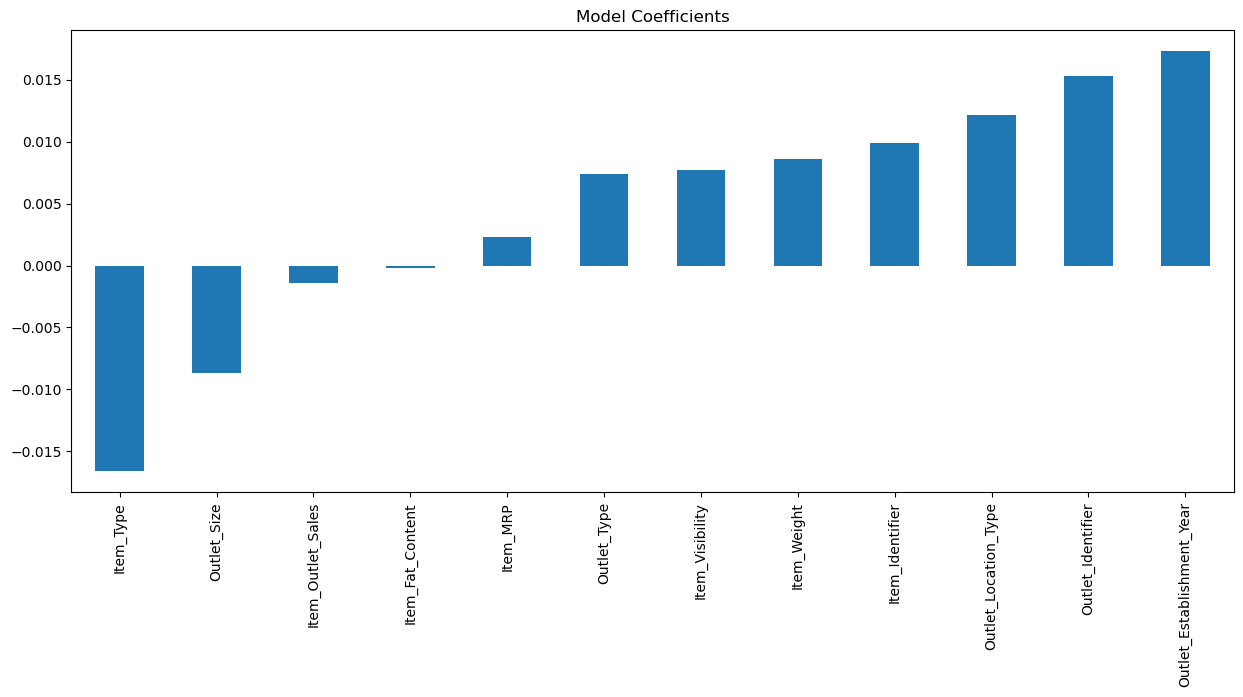

In [146]:
from sklearn.linear_model import LinearRegression
import pandas as pd
model = LinearRegression()
# Define feature names
feature_names = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']

# Convert X to DataFrame
X = pd.DataFrame(X, columns=feature_names)

# Train model and get coefficients

model.fit(X,y)
train(model, X,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
print(coef)
coef.plot(kind='bar', title="Model Coefficients")

###### Create Ridge Regression 

(8523, 12) (8523,)
(5966, 12) (2557, 12) (5966,) (2557,)


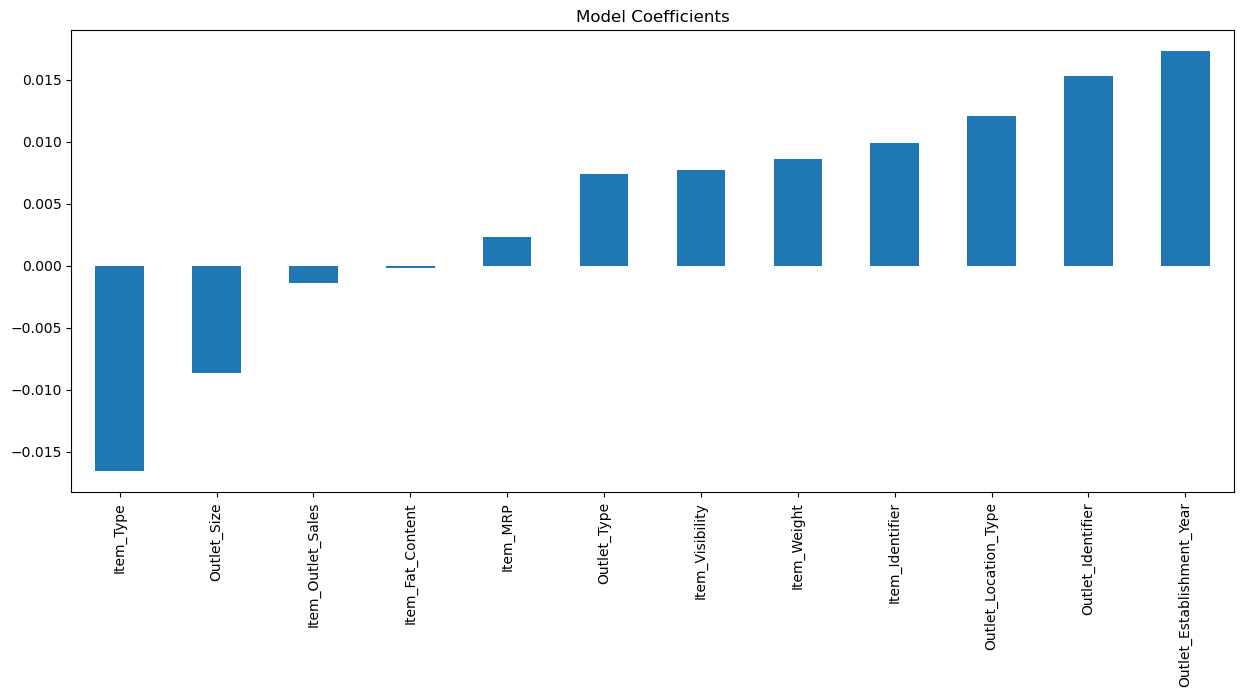

In [147]:
from sklearn.linear_model import Ridge
model = Ridge()
train(model, X,y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


###### Create  Lasso Regression 

(8523, 12) (8523,)
(5966, 12) (2557, 12) (5966,) (2557,)


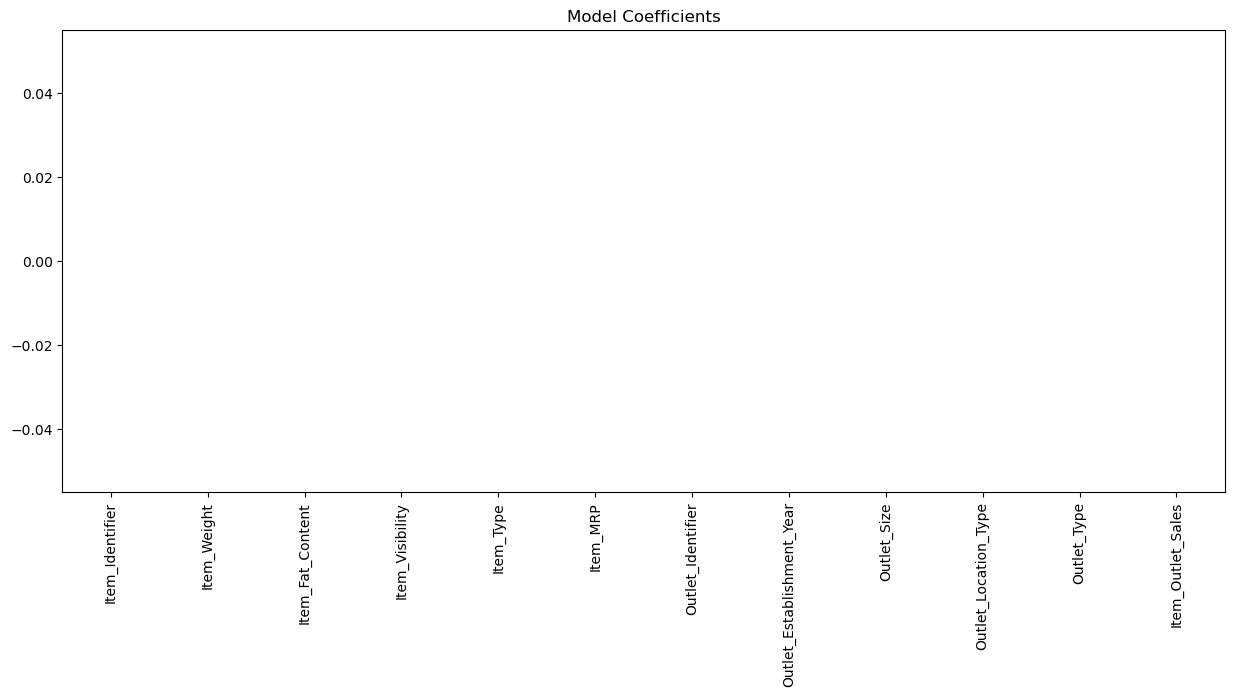

In [149]:
from sklearn.linear_model import Lasso
model = Lasso()
feature_names = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']

# Convert X to DataFrame
X = pd.DataFrame(X, columns=feature_names)
train(model, X,y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()

###### Decision Tree Regression  

(8523, 12) (8523,)
(5966, 12) (2557, 12) (5966,) (2557,)


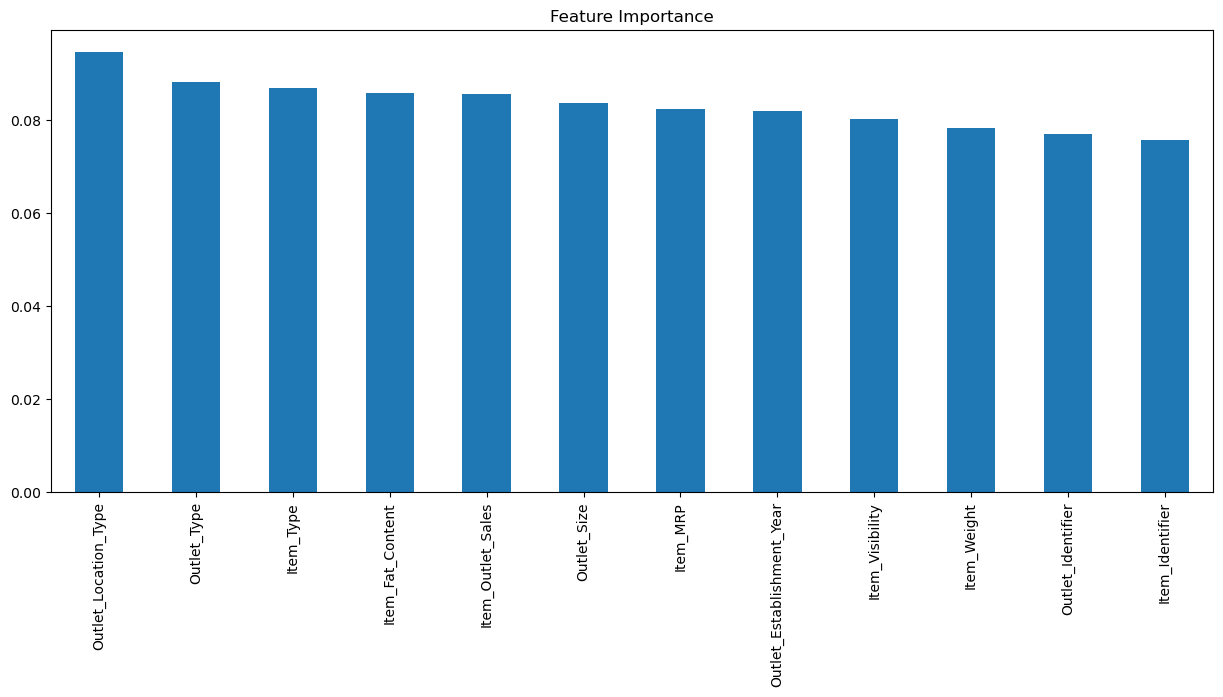

In [150]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
feature_names = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']

# Convert X to DataFrame
X = pd.DataFrame(X, columns=feature_names)
train(model, X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

###### Random Forest Regression

(8523, 12) (8523,)
(5966, 12) (2557, 12) (5966,) (2557,)


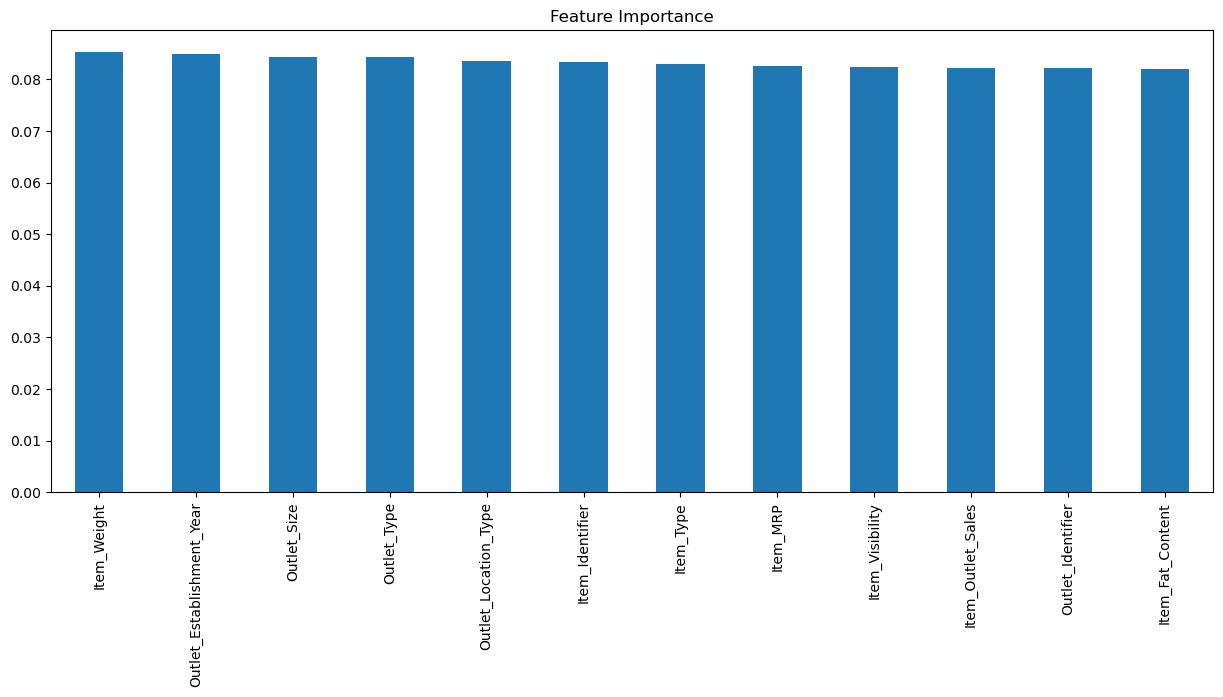

In [151]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
feature_names = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']

# Convert X to DataFrame
X = pd.DataFrame(X, columns=feature_names)
train(model, X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

###### Extra Tree Regression  

(8523, 12) (8523,)
(5966, 12) (2557, 12) (5966,) (2557,)


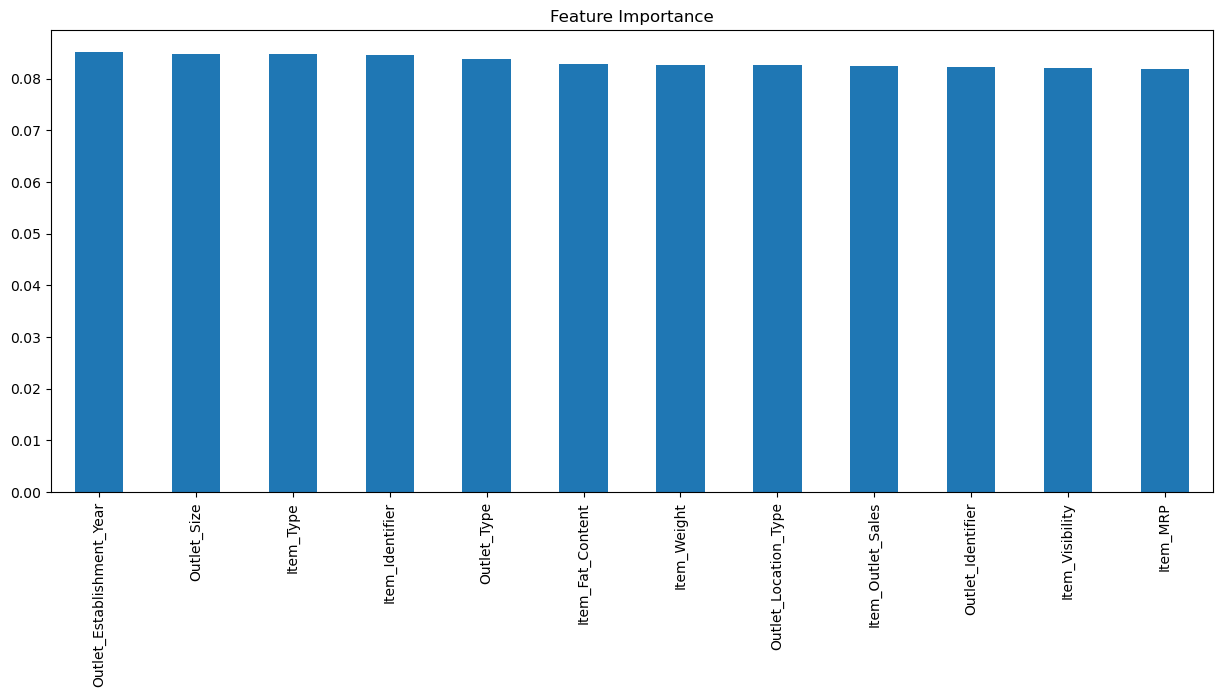

In [152]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
feature_names = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']

# Convert X to DataFrame
X = pd.DataFrame(X, columns=feature_names)
train(model, X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

###### LGBMRegressor

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 8523, number of used features: 12
[LightGBM] [Info] Start training from score 0.501806
(8523, 12) (8523,)
(5966, 12) (2557, 12) (5966,) (2557,)


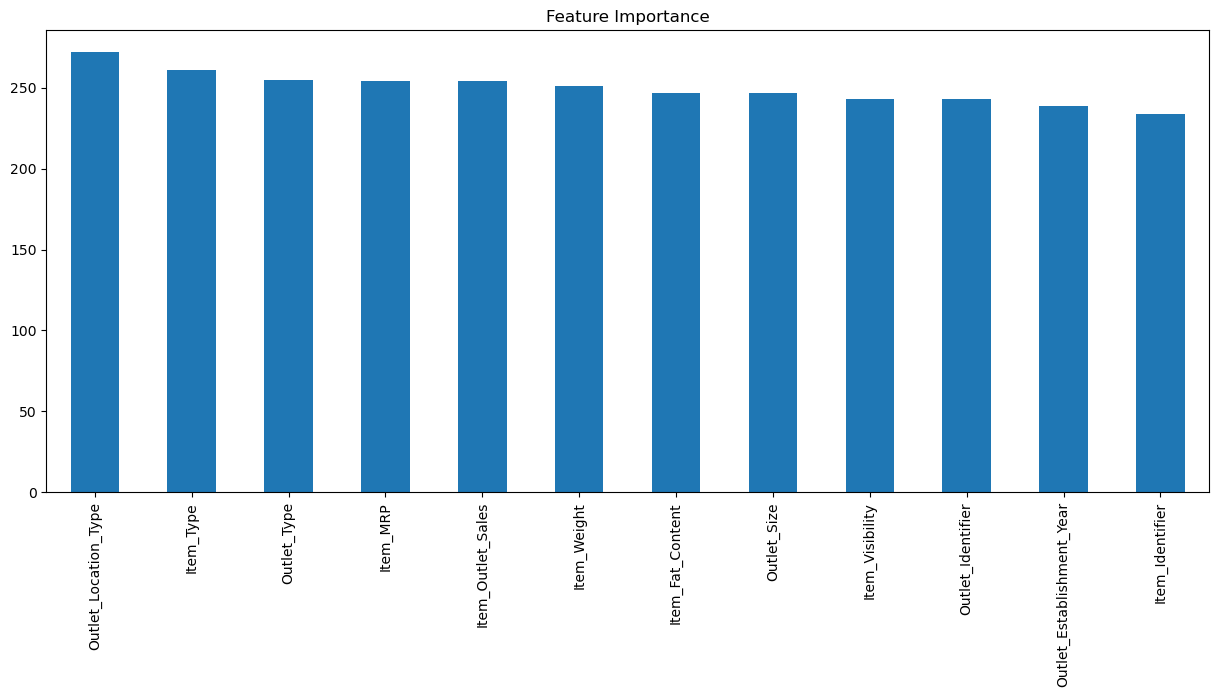

In [153]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
feature_names = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']

# Convert X to DataFrame
X = pd.DataFrame(X, columns=feature_names)
train(model, X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

###### XG Boost Regressor 

(8523, 12) (8523,)
(5966, 12) (2557, 12) (5966,) (2557,)


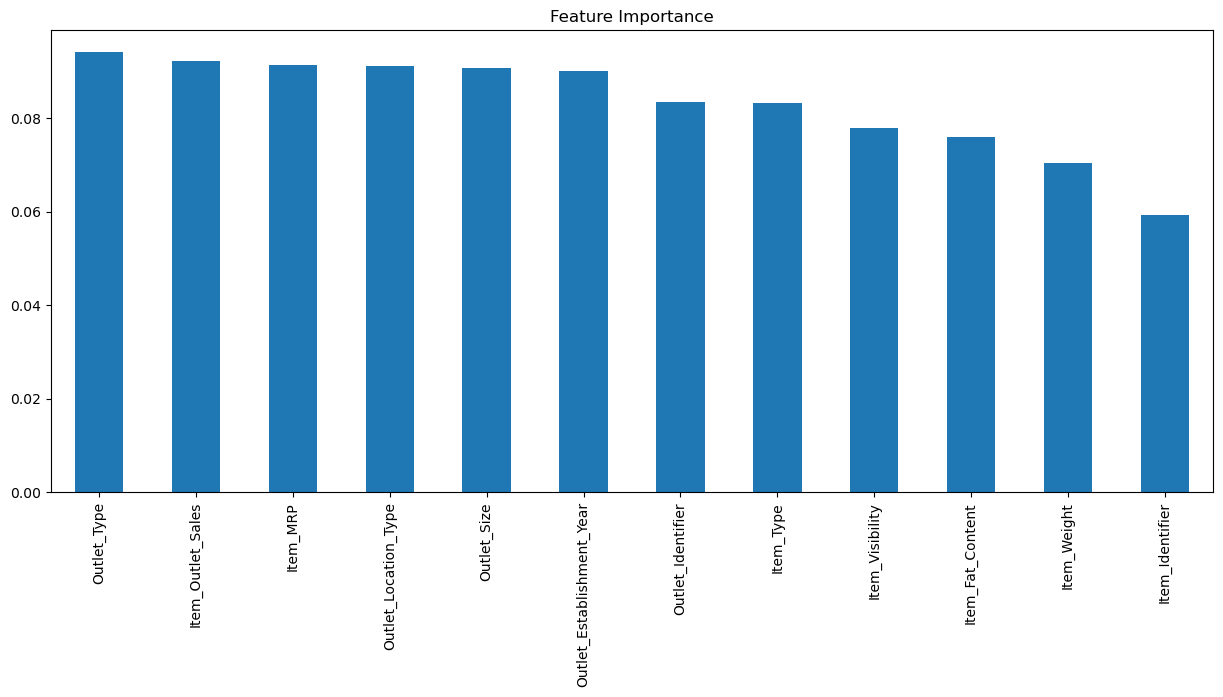

In [154]:
from xgboost import XGBRegressor
model = XGBRegressor()
train(model, X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

###### Train Test Split 

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (X.shape, y.shape)
print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)

(8523, 12) (8523,)
(5966, 12) (2557, 12) (5966,) (2557,)


In [156]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [157]:
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [158]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
display (rf.fit(X_train, y_train))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [160]:
print(rf.best_params_)
print(rf.best_score_)

{'min_samples_split': 100, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}
-0.08402446090672067


In [161]:
# Display Accuracy
print ()
print ('Accuracy')
print ('Accuracy of Test data')
y_test_pred = rf.predict(X_test)
print('R2_Score:', r2_score(y_test,y_test_pred))
print ('Accuracy of Training data')
y_train_pred = rf.predict(X_train)
print('R2_Score:', r2_score(y_train,y_train_pred))
print ('Accuracy of Complete data')
y_pred = rf.predict(X)
print('R2_Score:', r2_score(y,y_pred))
print ()


Accuracy
Accuracy of Test data
R2_Score: -0.0026383165354837423
Accuracy of Training data
R2_Score: 0.027171643536452184
Accuracy of Complete data
R2_Score: 0.01834349400206603



Display actual and predicted values


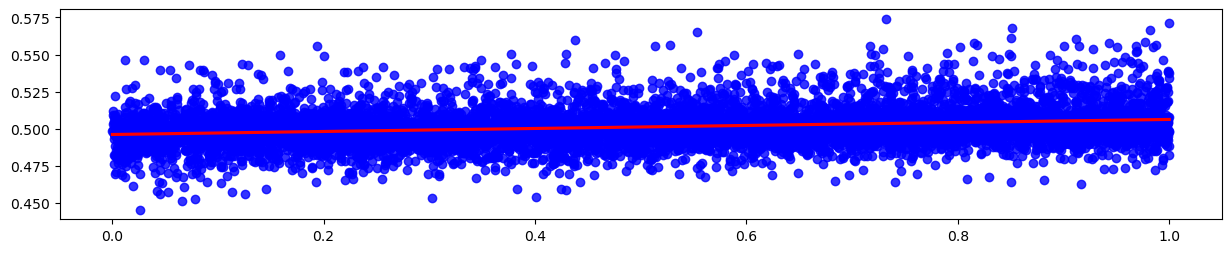

In [162]:
# Display graph with actual and predicted values 
    
plt.subplot (212)
print ('Display actual and predicted values')
sns.regplot( x =y, y= y_pred, scatter_kws={"color": "b"}, line_kws={"color": "r"},ci = None)
plt.show()

In [163]:
from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [ ]:
#Model LGBM Regressor 
lgb=LGBMRegressor()
lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(X,y)

In [166]:
print(lgb.best_params_)
print(lgb.best_score_)

{'gamma': 0.30582658024414044, 'learning_rate': 0.03211989156591522, 'max_depth': 2, 'n_estimators': 148, 'subsample': 0.8099098641033556}
-0.08373508869769582


In [167]:
# Display Accuracy
print ()
print ('Accuracy')
print ('Accuracy of Test data')
y_test_pred = lgb.predict(X_test)
print('R2_Score:', r2_score(y_test,y_test_pred))
print ('Accuracy of Training data')
y_train_pred = lgb.predict(X_train)
print('R2_Score:', r2_score(y_train,y_train_pred))
print ('Accuracy of Complete data')
y_pred = lgb.predict(X)
print('R2_Score:', r2_score(y,y_pred))
print ()



Accuracy
Accuracy of Test data
[LightGBM] [Warning] Unknown parameter: gamma
R2_Score: 0.014431544570004617
Accuracy of Training data
[LightGBM] [Warning] Unknown parameter: gamma
R2_Score: 0.015626407063226933
Accuracy of Complete data
[LightGBM] [Warning] Unknown parameter: gamma
R2_Score: 0.015275864094094094



Display actual and predicted values


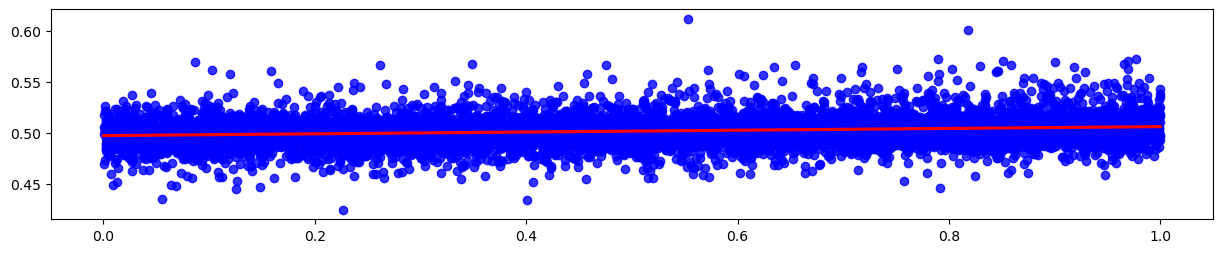

In [168]:
# Display graph with actual and predicted values 
    
plt.subplot (212)
print ('Display actual and predicted values')
sns.regplot( x =y, y= y_pred, scatter_kws={"color": "b"}, line_kws={"color": "r"},ci = None)
plt.show()


In [169]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [170]:
#XG Boost Regressor  
xgb = RandomizedSearchCV(estimator = model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb.fit(X,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.1s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gamma=0.07800932022121826, le

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022F02BE98B0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022F02BEBB00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022F02BEA360>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022F01DEF500>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [171]:
#Print Best Parameter   and plot Graph

print(xgb.best_params_)
print(xgb.best_score_)

{'gamma': 0.4692763545078751, 'learning_rate': 0.030233629752304297, 'max_depth': 5, 'n_estimators': 120, 'subsample': 0.8469926038510867}
-0.08371486585763381


In [172]:
# Display Accuracy
print ()
print ('Accuracy')
print ('Accuracy of Test data')
y_test_pred = xgb.predict(X_test)
print('R2_Score:', r2_score(y_test,y_test_pred))
print ('Accuracy of Training data')
y_train_pred = xgb.predict(X_train)
print('R2_Score:', r2_score(y_train,y_train_pred))
print ('Accuracy of Complete data')
y_pred = xgb.predict(X)
print('R2_Score:', r2_score(y,y_pred))
print ()



Accuracy
Accuracy of Test data
R2_Score: 0.030155571856212315
Accuracy of Training data
R2_Score: 0.03421632736574798
Accuracy of Complete data
R2_Score: 0.03301666405104464



Display actual and predicted values


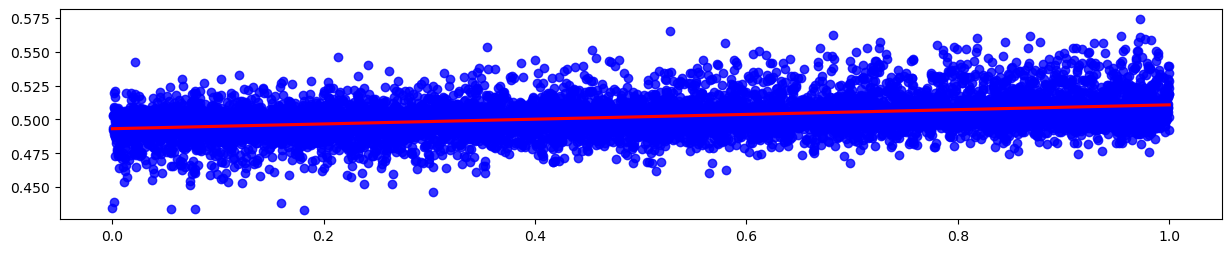

In [173]:
# Display graph with actual and predicted values 
    
plt.subplot (212)
print ('Display actual and predicted values')
sns.regplot( x =y, y= y_pred, scatter_kws={"color": "b"}, line_kws={"color": "r"},ci = None)
plt.show()
